# Life Expectancy and GDP
Written by TheJJSerg, Sug900, Fernando, and CalvinTheMechanic

This is a Codecademy Portfolio Project to use data visualization to analyze and plot data from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

We will analyze, prepare, and plot data in order to answer questions in a meaningful way. After our analysis, we will be creating a blog post to share our findings on the World Health Organization website.

## Project Objectives
- Complete a project to add to our portfolio
- Use `seaborn` and `Matplotlib` to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

## Overview of the Data
The dataset, `all_data.csv`, contains the following columns:
- **Country**: nation for a specific observation
- **Year**: the year for the observation
- **Life expectancy at birth (years)**: the life expectancy value in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Method and Analysis
1. Data Loading and Tiding
2. Data Analsyis
3. Data Visualization
4. Others

1. Data Loading and Tiding

In [1]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file into a dataframe
gdp_data = pd.read_csv('all_data.csv')

#print the first 5 rows
print('HEAD OF THE DATAFRAME:')
print('======================')
print(gdp_data.head(),"\n")

#print the info of the df and main stats of the variables
print('INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:')
print('=================================================================')
print(gdp_data.info(), "\n")
print('DESCRIPTION ABOUT THE DATA:')
print('===========================')
print(gdp_data.describe(include='all'), "\n")
#reduce life expectancy variable name

gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)
print('DATAFRAME RENAMED:')
print('===========================')
print(gdp_data.head())

HEAD OF THE DATAFRAME:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memor

* The data contains 96 entries with no null values
* The data types are correct as the `Country` variable is a string while the `Life expectancy at birth (years)` and `GDP` are float. The `Year` variable is an integer
* The data shows no issues with missing data or wrong entries 
* The `Life expectancy at birth (years)` variable was renamed to `Life`

Since there are six different countries, we will create six different DataFrames to analyze specific countries more efficiently.

In [2]:
# Create DataFrames for Each Country
chile = gdp_data[gdp_data["Country"] == "Chile"]
china = gdp_data[gdp_data["Country"] == "China"]
germany = gdp_data[gdp_data["Country"] == "Germany"]
mexico = gdp_data[gdp_data["Country"] == "Mexico"]
usa = gdp_data[gdp_data["Country"] == "United States of America"]
zimbabwe = gdp_data[gdp_data["Country"] == "Zimbabwe"]

We will visualize the different spread for `Life Expectancy` for each country.

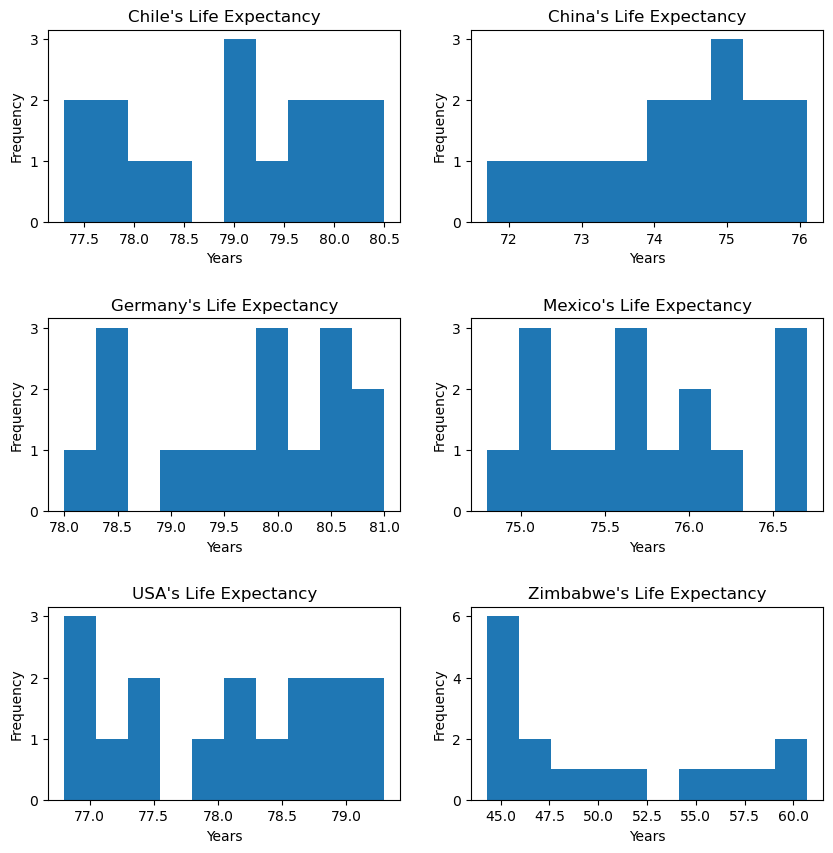

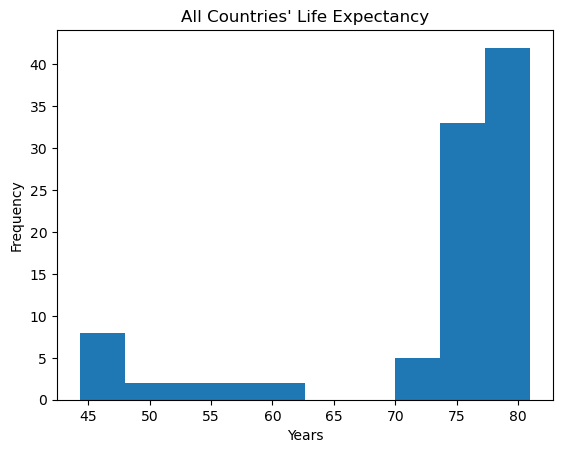

In [3]:
# Create a Figure
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(hspace = .5)

# Create the First Subplot, Chile
ax1 = plt.subplot(3, 2, 1) # 3 Rows, 2 Columns, 1st Subplot
plt.hist(chile["Life"])
plt.title("Chile's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Create the Second Subplot, China
ax2 = plt.subplot(3, 2, 2)
plt.hist(china["Life"])
plt.title("China's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Create the Third Subplot, Germany
ax3 = plt.subplot(3, 2, 3)
plt.hist(germany["Life"])
plt.title("Germany's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Create the Fourth Subplot, Mexico
ax4 = plt.subplot(3, 2, 4)
plt.hist(mexico["Life"])
plt.title("Mexico's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Create the Fifth Subplot, USA
ax5 = plt.subplot(3, 2, 5)
plt.hist(usa["Life"])
plt.title("USA's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Create the Sixth Subplot, Zimbabwe
ax6 = plt.subplot(3, 2, 6)
plt.hist(zimbabwe["Life"])
plt.title("Zimbabwe's Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Show and Close the Plot
plt.show()
plt.close()

##########
# Create a histogram of All Countries' Life Expectancy
plt.hist(gdp_data["Life"])

# Create labels for the plot
plt.title("All Countries' Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Show and close the plot
plt.show()
plt.close()

The distributions for `Life Expectancy` doesn't appear to have any pattern between them. However, `Zimbabwe`'s distribution of `Life Expectancy` is significantly smaller than the distribution of the other countries' `Life Expectancy`. In the combined **All Countries' Life Expectancy** histogram, `Zimbabwe` looks to be an outlier to the rest of the countries, who have a relatively higher `Life Expectancy`. 

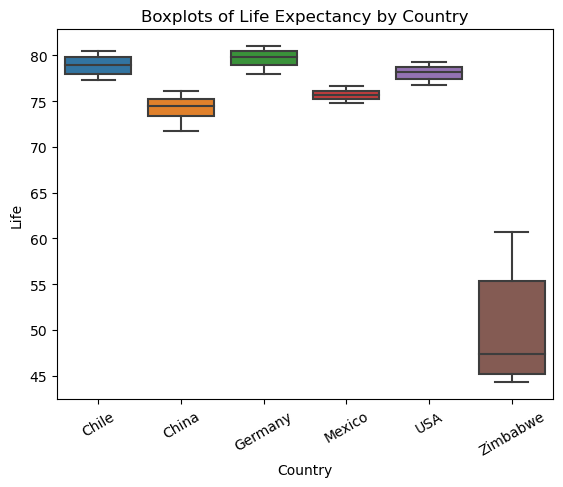

In [4]:
# Create Boxplots of Life Expectancy and Country
sns.boxplot(x = "Country", y = "Life", data = gdp_data)

# Create a Subplot
ax = plt.subplot()

# Set the x-tick position using a list of numbers by the length of unique Years
ax.set_xticks(range(len(gdp_data["Country"].unique()))) 
# Set the x-tick labels and rotate them by 30 degrees
ax.set_xticklabels(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"], 
                   rotation = 30)
# Create labels for the plot
plt.title("Boxplots of Life Expectancy by Country")

# Show and Close the Plot
plt.show()
plt.close()

Using the **Boxplots of Life Expectancy by Country**, we have a more clear visualization of the spread of each countries' `Life Expectancy`. The `Life Expectancy` for `Zimbabwe` is a clear outlier to the spread of the other countries. In addition, the median `Life Expectancy` for `Chile`, `Germany`, and `USA` look to be similar which are followed by `Mexico` and then `China`. 

Although `Zimbabwe` seems to be an outlier for `Life Expectancy`, and it, by far, has the lowest `Life Expectancy` in the group of countries, `Zimbabwe` has the largest range of `Life Expectancy`, spanning about **15 years**!

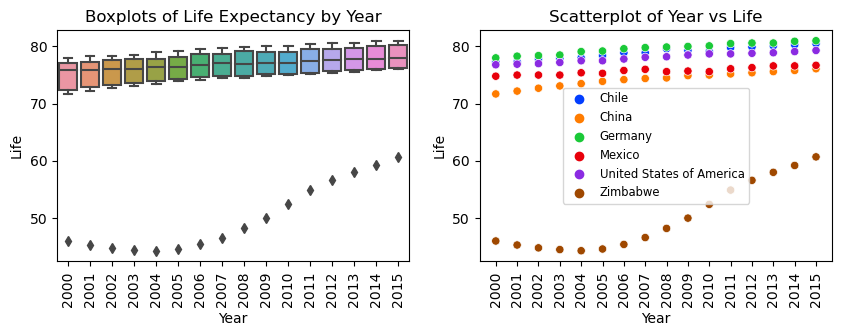

In [14]:
# Create a Figure
fig = plt.figure(figsize = (10, 3))
plt.subplots_adjust(hspace = .5)

# Create the First Subplot, Boxplots of Life Expectancy and Year
ax1 = plt.subplot(1, 2, 1) # 1 Row, 2 Columns, 1st Subplot
sns.boxplot(x = "Year", y = "Life", data = gdp_data)
# Set the x-tick position using a list of numbers by the length of unique Years
ax1.set_xticks(range(len(gdp_data["Year"].unique()))) 
# Set the x-tick labels and rotate them by 30 degrees
ax1.set_xticklabels(gdp_data["Year"].unique(), rotation = 90)
# Create labels for the plot
plt.title("Boxplots of Life Expectancy by Year")


# Create the Second Subplot, Scatterplot of Life Expectancy and Year
ax2 = plt.subplot(1, 2, 2) 
sns.scatterplot(x = "Year", y = "Life", hue = "Country", 
                palette = "bright", data = gdp_data)
# Set the x-tick position using a list of numbers by the length of unique Years
ax2.set_xticks(gdp_data["Year"].unique())
# Set the x-tick labels and rotate them by 30 degrees
ax2.set_xticklabels(gdp_data["Year"].unique(), rotation = 90)
# Create labels for the plot
plt.title("Scatterplot of Year vs Life")
plt.legend(fontsize = "small")

# Show and close the plot
plt.show()
plt.close()

The **Boxplots of Life Expectancy by Year** shows that the median `Life Expectancy` steadily grows from `2000` to `2015`. However, there is an interesting outlier that dips from `2000` to `2004`, then grows quickly after `2005`.

Comparing the **Scatterplot of Year vs Life**, we see that the outlier in **Boxplots of Life Expectancy by Year** belongs to `Zimbabwe`. We also see that the max value of `Life Expectancy` is typically `Germany`, and the median value of `Life Expectancy` is typically `USA`. 

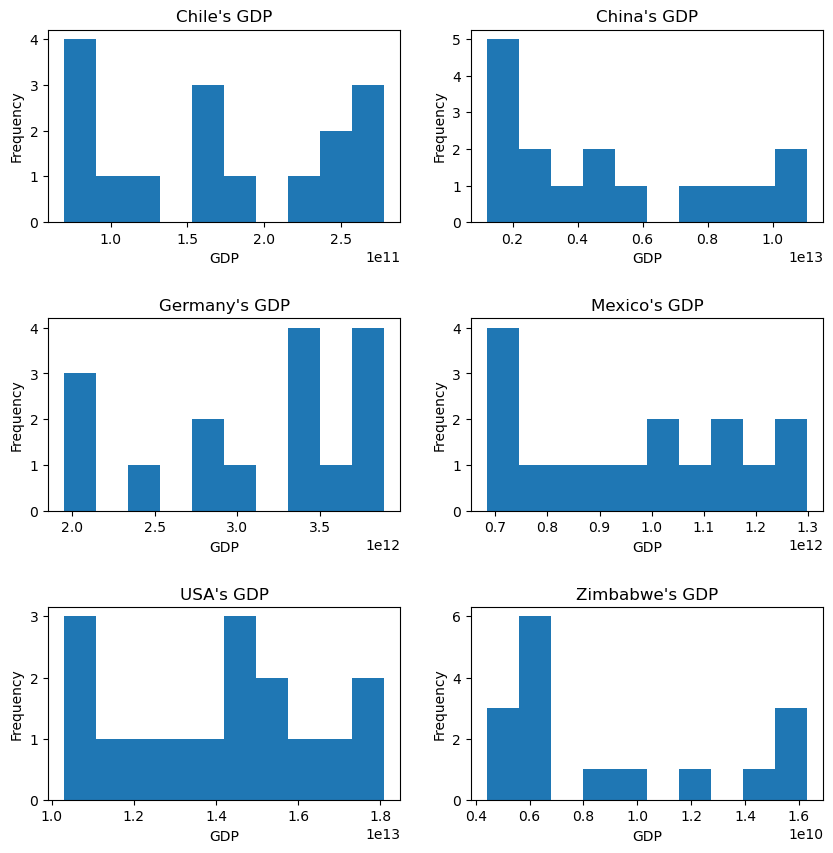

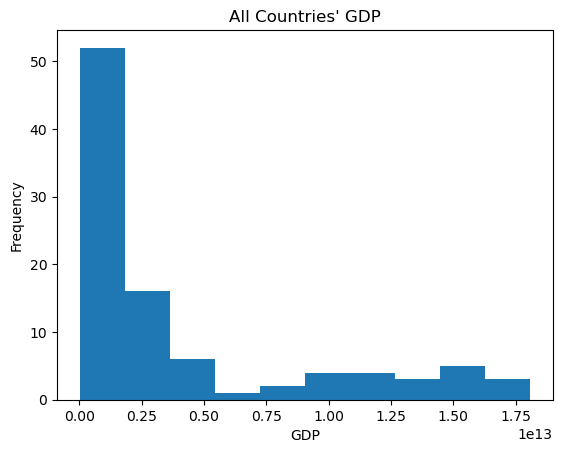

In [17]:
# Create a Figure
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(hspace = .5)

# Create the First Subplot, Chile
ax1 = plt.subplot(3, 2, 1) # 3 Rows, 2 Columns, 1st Subplot
plt.hist(chile["GDP"])
plt.title("Chile's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Create the Second Subplot, China
ax2 = plt.subplot(3, 2, 2)
plt.hist(china["GDP"])
plt.title("China's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Create the Third Subplot, Germany
ax3 = plt.subplot(3, 2, 3)
plt.hist(germany["GDP"])
plt.title("Germany's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Create the Fourth Subplot, Mexico
ax4 = plt.subplot(3, 2, 4)
plt.hist(mexico["GDP"])
plt.title("Mexico's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Create the Fifth Subplot, USA
ax5 = plt.subplot(3, 2, 5)
plt.hist(usa["GDP"])
plt.title("USA's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Create the Sixth Subplot, Zimbabwe
ax6 = plt.subplot(3, 2, 6)
plt.hist(zimbabwe["GDP"])
plt.title("Zimbabwe's GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Show and Close the Plot
plt.show()
plt.close()

##########
# Create a histogram of All Countries' Life Expectancy
plt.hist(gdp_data["GDP"])

# Create labels for the plot
plt.title("All Countries' GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")

# Show and close the plot
plt.show()
plt.close()

Here, we show the distribution of each countries' `GDP`. Similar to their `Life Expectancy` being smaller than the rest of the data, the `GDP` for `Zimbabwe` is significantly smaller with its max value being in the ten billions. 

Important Note:
- `1e9`: represents one billion
- `1e10`: represents ten billion
- `1e11`: represents one hundred billion
- `1e12`: represents one trillion
- `1e13`: represents ten trillion

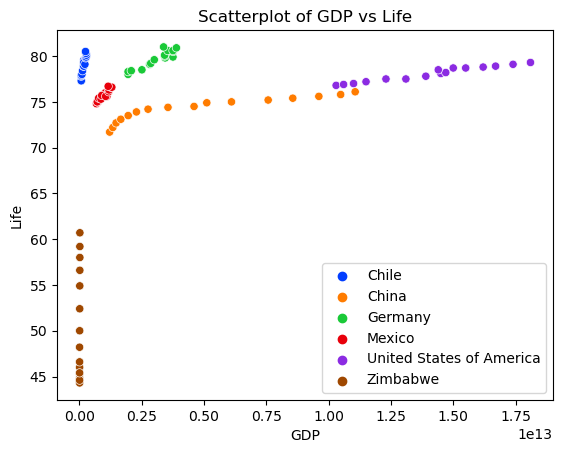

In [8]:
# Create a scatterplot Year vs Life Expectancy
sns.scatterplot(x = "GDP", y = "Life", hue = "Country", 
                palette = "bright", data = gdp_data)

# Create labels for the plot
plt.title("Scatterplot of GDP vs Life")
plt.legend()

# Show and close the plot
plt.show()
plt.close()

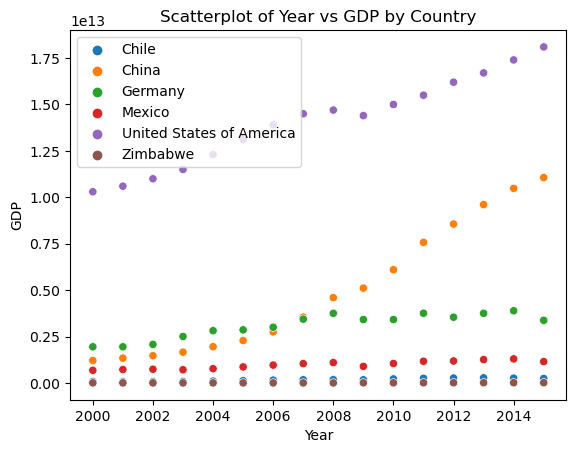

In [9]:
# Create a scatterplot Year vs GDP
sns.scatterplot(x = "Year", y = "GDP", hue = "Country", 
                data = gdp_data)

# Create labels for the plot
plt.title("Scatterplot of Year vs GDP by Country")
plt.legend()

# Show and close the plot
plt.show()
plt.close()

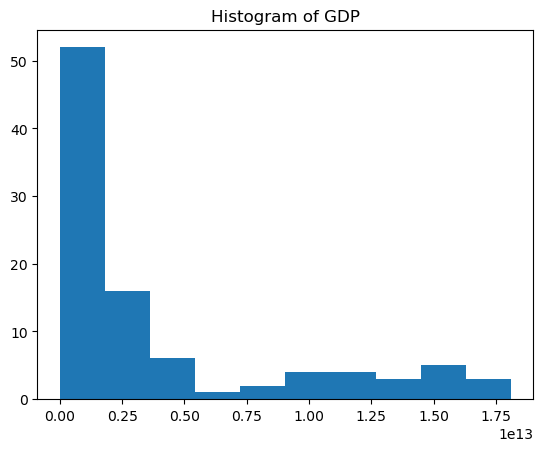

In [10]:
# Create a histogram of gdp
plt.hist(gdp_data["GDP"])

# Create labels for the plot
plt.title("Histogram of GDP")

# Show and close the plot
plt.show()
plt.close()